In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### 读取文件比较

In [2]:
def drop_err(X, y):
    out = []
    for i in range(X[0].size):
        t = abs(np.mean(X.T[i]))
        for j in range(X.shape[0]):
            if abs(X[j][i]) > t * 3e2:
                out.append(j)
    return np.delete(X, out, axis=0), np.delete(y, out)

def readfile():
    df = pd.read_csv('train_feature.csv')
    df.fillna(df.median(), inplace=True)
    X = np.array(df.values)
    y = np.loadtxt('train_label.csv', skiprows=1, dtype="int")
    return X, y

def readfile_drop():
    df = pd.read_csv('train_feature.csv')
    p = df.isnull().any(axis=1)
    df.dropna(inplace=True)
    X = np.array(df.values)
    y = np.loadtxt('train_label.csv', skiprows=1, dtype="int")
    y = y[(p == False)]
    return X, y

X, y = readfile()
Xd, yd= readfile_drop()
Xr, yr = drop_err(X, y)
Xrd, yrd = drop_err(Xd, yd)
print(y.size)
print(yd.size)
print(yr.size)
print(yrd.size)

10000
5486
8666
4797


#### 预处理-单特征

0 1 2 3 4 5 6 7 8 9 10 11 0 1 2 3 4 5 6 7 8 9 10 11 0 1 2 3 4 5 6 7 8 9 10 11 0 1 2 3 4 5 6 7 8 9 10 11 

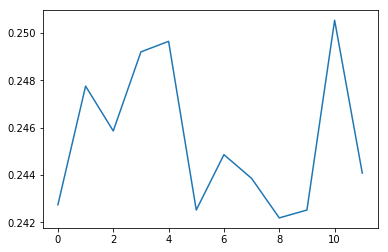

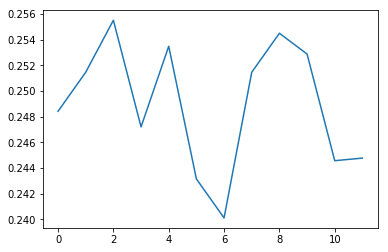

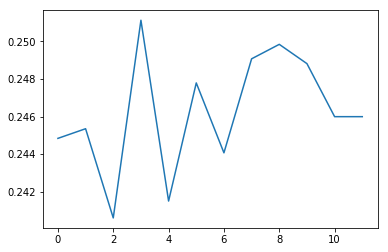

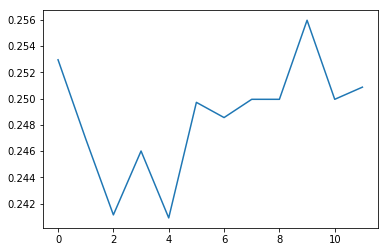

In [7]:
def score_feature(f, y):
    seq = np.argsort(f)
    y = y[seq]
    l = [0, 0, 0, 0]
    r = [0, 0, 0, 0]
    for i in range(4):
        r[i] = np.size(np.where(y == i))
    rsize = y.size
    lsize = 0
    m = 0
    for j in y:
        l[j] += 1
        r[j] -= 1
        lsize += 1
        rsize -= 1
        if (rsize == 0): break
        dl = 0
        dr = 0
        for i in range(4):
            p = l[i] / lsize
            if p != 0: dl -= p * np.log(p)
            p = r[i] / rsize
            if p != 0: dr -= p * np.log(p)
        gain = lsize * dl + rsize * dr
        if (gain > m): m = gain
    return m

def choose_feature(X, y):
    fnum = X[0].size
    fscore = np.zeros(fnum)
    for i in range(fnum):
        fscore[i] = score_feature(X.T[i], y)
    seq = np.argsort(fscore)
    return seq

def test_features(X, y):
    p = np.zeros(12)
    clf = SVC()
    seq = choose_feature(X, y)
    for i in range(12):
        choice = seq[10 * i - 120:]
        X0 = X[:, choice]
        print(str(i), end=" ")
        for _ in range(3):
            t = (int)(0.7 * y.size)
            index = np.random.permutation(y.size)
            X0 = X0[index]
            y = y[index]
            X_train = X0[0:(t-1),:]
            X_test = X0[t:(y.size-1),:]
            y_train = y[0:(t-1)]
            y_test = y[t:(y.size-1)]
            clf.fit(X_train, y_train)
            p[i] += clf.score(X_test, y_test)
        p[i] /= 3
    plt.figure()
    plt.plot(p)

test_features(X, y)
test_features(Xd, yd)
test_features(Xr, yr)
test_features(Xrd, yrd)

#### 预处理-RFE

0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 

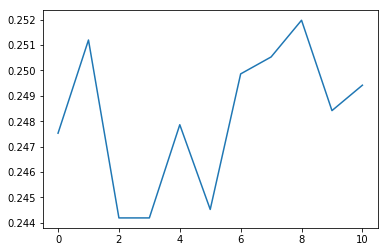

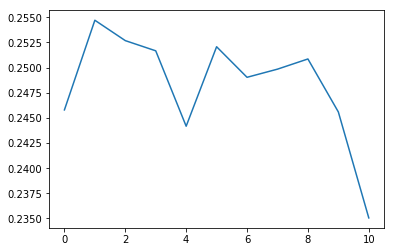

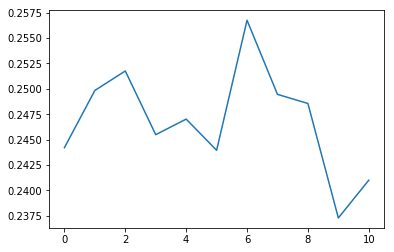

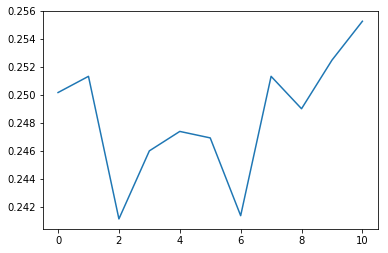

In [4]:
from sklearn.feature_selection import RFE

def test_rfe(X, y):
    p = np.zeros(11)
    clf = DecisionTreeClassifier()
    ct = SVC()
    for i in range(11):
        model = RFE(estimator=clf, n_features_to_select=110-10*i, step=10)
        X = model.fit_transform(X, y)
        print(str(i), end=" ")
        for _ in range(3):
            t = (int)(0.7 * y.size)
            index = np.random.permutation(y.size)
            X = X[index]
            y = y[index]
            X_train = X[0:(t-1),:]
            X_test = X[t:(y.size-1),:]
            y_train = y[0:(t-1)]
            y_test = y[t:(y.size-1)]
            ct.fit(X_train, y_train)
            p[i] += ct.score(X_test, y_test)
        p[i] /= 3
    plt.figure()
    plt.plot(p)

test_rfe(X, y)
test_rfe(Xd, yd)
test_rfe(Xr, yr)
test_rfe(Xrd, yrd)

#### 预处理-RFE2

0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 

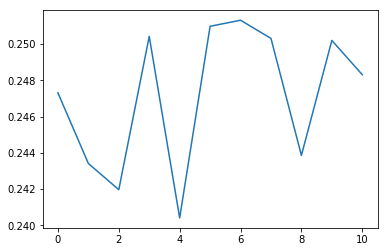

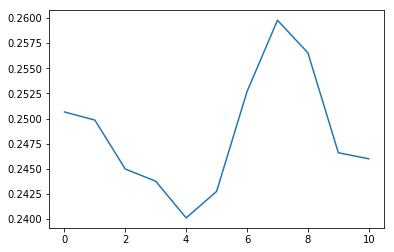

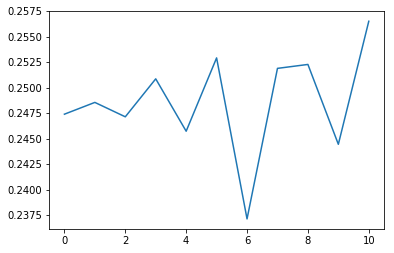

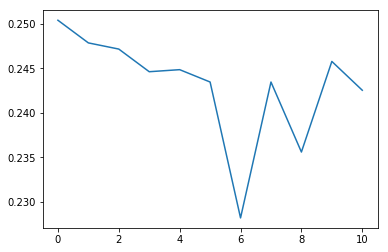

In [9]:
def test_rfe2(X, y):
    p = np.zeros(11)
    clf = LogisticRegression(penalty="l1")
    ct = SVC()
    for i in range(11):
        model = RFE(estimator=clf, n_features_to_select=110-10*i, step=10)
        X = model.fit_transform(X, y)
        print(str(i), end=" ")
        for _ in range(3):
            t = (int)(0.7 * y.size)
            index = np.random.permutation(y.size)
            X = X[index]
            y = y[index]
            X_train = X[0:(t-1),:]
            X_test = X[t:(y.size-1),:]
            y_train = y[0:(t-1)]
            y_test = y[t:(y.size-1)]
            ct.fit(X_train, y_train)
            p[i] += ct.score(X_test, y_test)
        p[i] /= 3
    plt.figure()
    plt.plot(p)

test_rfe2(X, y)
test_rfe2(Xd, yd)
test_rfe2(Xr, yr)
test_rfe2(Xrd, yrd)

#### 预处理-PCA

0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 0 1 2 3 4 5 6 7 8 9 10 

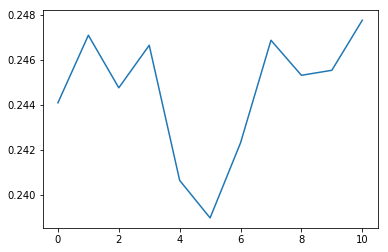

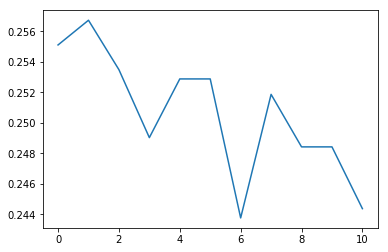

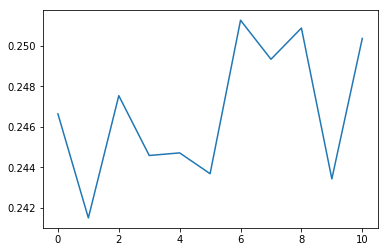

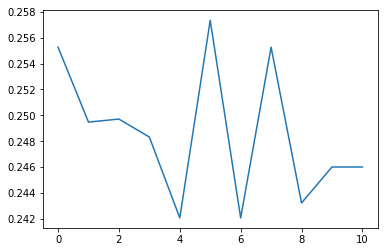

In [10]:
from sklearn.decomposition import PCA

def test_pca(X, y):
    p = np.zeros(11)
    clf = SVC()
    for i in range(11):
        X0 = PCA(n_components=110-10*i).fit_transform(X)
        print(str(i), end=" ")
        for _ in range(3):
            t = (int)(0.7 * y.size)
            index = np.random.permutation(y.size)
            X0 = X0[index]
            y = y[index]
            X_train = X0[0:(t-1),:]
            X_test = X0[t:(y.size-1),:]
            y_train = y[0:(t-1)]
            y_test = y[t:(y.size-1)]
            clf.fit(X_train, y_train)
            p[i] += clf.score(X_test, y_test)
        p[i] /= 3
    plt.figure()
    plt.plot(p)

test_pca(X, y)
test_pca(Xd, yd)
test_pca(Xr, yr)
test_pca(Xrd, yrd)

#### 预处理-PCA2

0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 

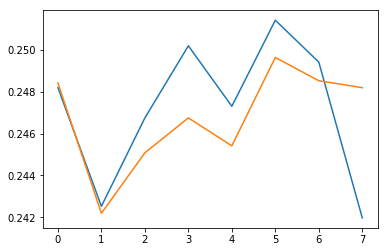

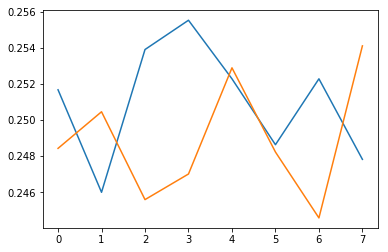

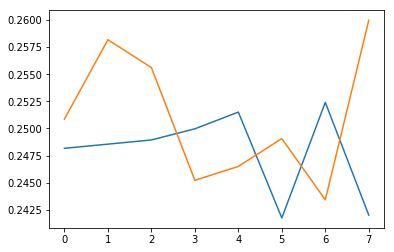

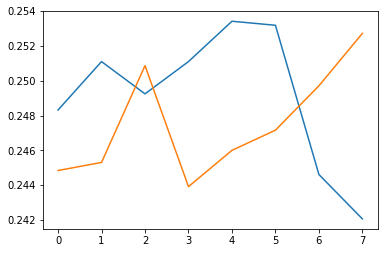

In [11]:
def test_pca2(X, y, n, fig:bool):
    p = np.zeros(8)
    clf = SVC()
    c = DecisionTreeClassifier()
    model = RFE(estimator=c, n_features_to_select=n, step=10)
    X = model.fit_transform(X, y)
    for i in range(8):
        X0 = PCA(n_components=n-5*i).fit_transform(X)
        print(str(i), end=" ")
        for _ in range(3):
            t = (int)(0.7 * y.size)
            index = np.random.permutation(y.size)
            X0 = X0[index]
            y = y[index]
            X_train = X0[0:(t-1),:]
            X_test = X0[t:(y.size-1),:]
            y_train = y[0:(t-1)]
            y_test = y[t:(y.size-1)]
            clf.fit(X_train, y_train)
            p[i] += clf.score(X_test, y_test)
        p[i] /= 3
    if (fig): plt.figure()
    plt.plot(p)

test_pca2(X, y, 85, True)
test_pca2(X, y, 40, False)
test_pca2(Xd, yd, 85, True)
test_pca2(Xd, yd, 40, False)
test_pca2(Xr, yr, 85, True)
test_pca2(Xr, yr, 40, False)
test_pca2(Xrd, yrd, 85, True)
test_pca2(Xrd, yrd, 40, False)

### 预处理-PCA3

0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 

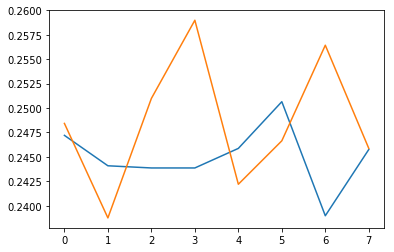

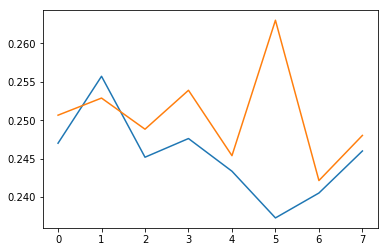

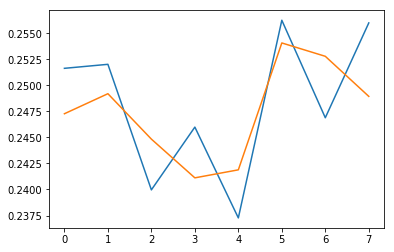

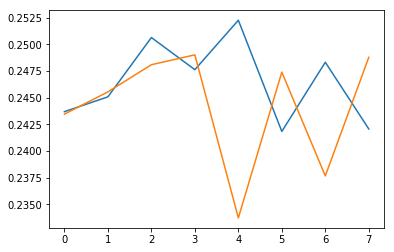

In [6]:
def test_pca3(X, y, n, fig:bool):
    p = np.zeros(8)
    clf = SVC()
    c = LogisticRegression(penalty="l1")
    model = RFE(estimator=c, n_features_to_select=n, step=10)
    X = model.fit_transform(X, y)
    for i in range(8):
        X0 = PCA(n_components=n-5*i).fit_transform(X)
        print(str(i), end=" ")
        for _ in range(3):
            t = (int)(0.7 * y.size)
            index = np.random.permutation(y.size)
            X0 = X0[index]
            y = y[index]
            X_train = X0[0:(t-1),:]
            X_test = X0[t:(y.size-1),:]
            y_train = y[0:(t-1)]
            y_test = y[t:(y.size-1)]
            clf.fit(X_train, y_train)
            p[i] += clf.score(X_test, y_test)
        p[i] /= 3
    if (fig): plt.figure()
    plt.plot(p)

test_pca3(X, y, 85, True)
test_pca3(X, y, 40, False)
test_pca3(Xd, yd, 85, True)
test_pca3(Xd, yd, 40, False)
test_pca3(Xr, yr, 85, True)
test_pca3(Xr, yr, 40, False)
test_pca3(Xrd, yrd, 85, True)
test_pca3(Xrd, yrd, 40, False)